In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scikits.odes import ode
from matplotlib.ticker import FormatStrFormatter

In [3]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

## Deterministic model

In [4]:
def cmv(t, y, ydot):
    """Equatiosn from A Model for HCMV Infection in Immunosuppressed Patients."""
    ydot[0] = n*δ*y[2] - c*y[0] - f*k*y[3]*y[0] # V
    ydot[1] = (1-ϵ)*(μ*(1-y[1]/e)*y[1] + ρ*y[0]) # E
    ydot[2] = k*y[3]*y[0] - δ*y[2] - (1 - ϵ)*m*y[1]*y[2] + α*y[4] - κ*y[2] # I
    ydot[3] = λ*(1 - y[3]/s)*y[3] - k*y[3]*y[0] # S
    ydot[4] = λ*(1 - y[4]/r)*y[4] - α*y[4] + κ*y[2] # L    

### Primary infection

In [5]:
n = 5e1
δ = 2e-1
c = 3e-1
f = 1
k = 1e-4
ϵ = 0
μ = 4e-2
λ = 1e-3
e = 9
ρ = 5
m = 1e-1
α = 2e-1
κ = 2e-3
r = 4e-2
s = 4e2

In [6]:
initx = [1e-4,0,0,400.0,0]
solver = ode('cvode', cmv, old_api=False, max_steps=5000)

times = np.linspace(0, 365, 101)
solution = solver.solve(times, initx)

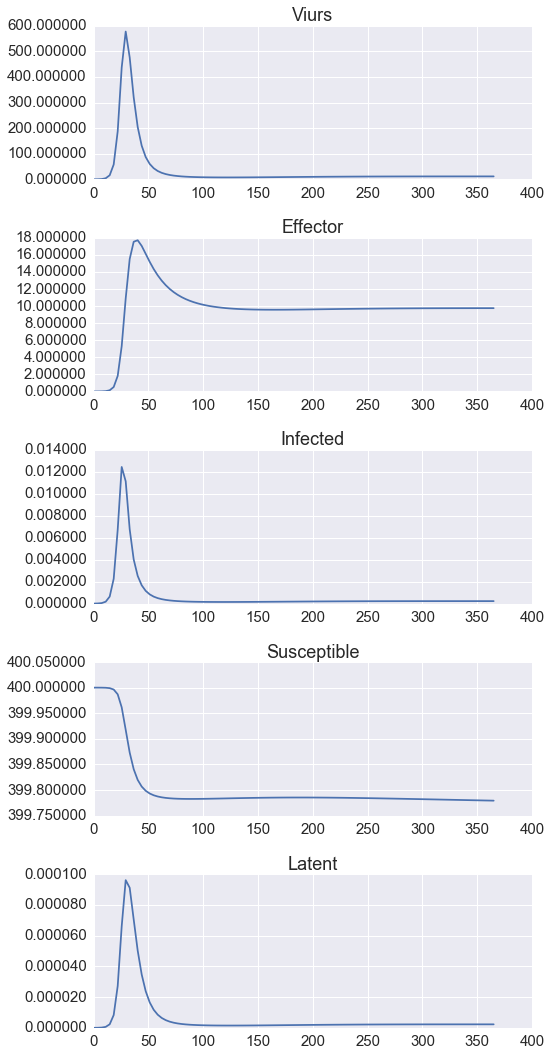

In [7]:
plt.style.use('seaborn-darkgrid')
variables = ['Viurs', 'Effector', 'Infected', 'Susceptible', 'Latent']
fig, axes = plt.subplots(5, 1, figsize=(8, 15))
for i, ax in enumerate(axes):
    if i==0:
        factor = 1000/0.57
    else:
        factor = 1
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    ax.plot(solution.values.t, factor*solution.values.y[:,i])
    ax.set_title(variables[i])
plt.tight_layout()
pass

### Latent infection

In [8]:
V, E, I, S, L = solution.values.y[-1, :]
print("Viurs = %.4f" % V)
print("Effector = %.4f" % E)
print("Infected = %.6f" % I)
print("Susceptible = %.4f" % S)
print("Latent = %.6f" % L)

Viurs = 0.0066
Effector = 9.7589
Infected = 0.000224
Susceptible = 399.7793
Latent = 0.000002


### Immune Suppression

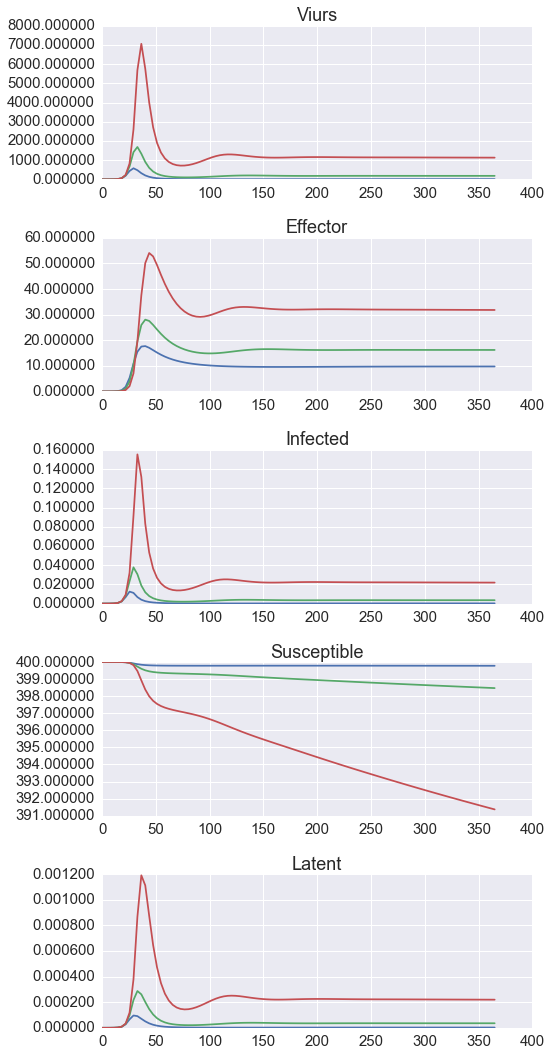

In [9]:
fig, axes = plt.subplots(5, 1, figsize=(8, 15))

for ϵ in [0, 0.4, 0.7]:
    initx = [1e-4,0,0,400.0,0]
    solver = ode('cvode', cmv, old_api=False, max_steps=5000)

    times = np.linspace(0, 365, 101)
    solution = solver.solve(times, initx)
    
    for i, ax in enumerate(axes):
        if i==0:
            factor = 1000/0.57
        else:
            factor = 1
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
        ax.plot(solution.values.t, factor*solution.values.y[:,i])
        ax.set_title(variables[i])
        
plt.tight_layout()

### Equilibrium with suppression

In [10]:
ps = []
for ϵ in np.linspace(0, 0.9, 10):
    initx = [1e-4,0,0,400.0,0]
    solver = ode('cvode', cmv, old_api=False, max_steps=5000)

    times = np.linspace(0, 365, 101)
    solution = solver.solve(times, initx)

    ps.append(np.r_[ϵ, solution.values.y[-1, :]])

In [11]:
df = pd.DataFrame(np.array(ps), columns=['ϵ', 'V', 'E', 'I', 'S', 'L'])
df['V'] = 1000/0.57 * df['V']

In [12]:
df = pd.melt(df, 'ϵ')

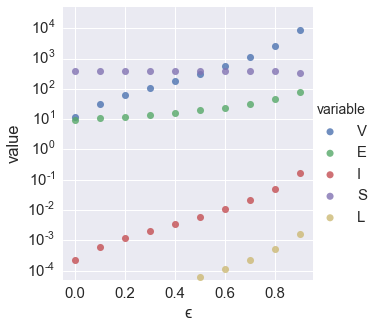

In [13]:
g = sns.lmplot(x='ϵ', y='value', hue='variable', fit_reg=False, data=df, scatter_kws={'s': 50})
g.ax.set_yscale('log')
g.ax.set_ylim([5e-5, 5e4])
g.ax.set_xlim([-0.05, 0.95])
pass

### Reactivation

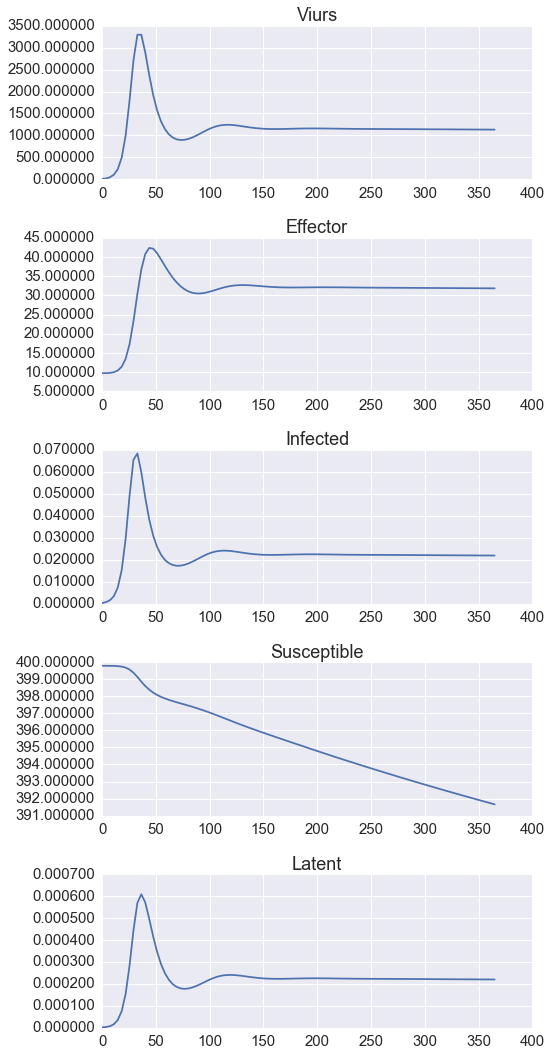

In [14]:
# Steady state soluiotn after one year with immune suppreession ϵ=0.7
fig, axes = plt.subplots(5, 1, figsize=(8, 15))
for ϵ in [0.7]:
    initx = V, E, I, S, L
    solver = ode('cvode', cmv, old_api=False, max_steps=5000)
    times = np.linspace(0, 365, 101)
    solution = solver.solve(times, initx)
    
    for i, ax in enumerate(axes):
        if i==0:
            factor = 1000/0.57
        else:
            factor = 1
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
        ax.plot(solution.values.t, factor*solution.values.y[:,i])
        ax.set_title(variables[i])
plt.tight_layout()